#Importing models

In [ ]:
!pip install ultralytics opencv-python pandas numpy matplotlib
!pip install git+https://github.com/ultralytics/ultralytics.git

import torch
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
import cv2
import numpy as np
import pandas as pd

class AdvancedBubbleAnalyzer:
    def __init__(self, mask_rcnn_weights_path):
        #Initialize Mask R-CNN
        self.cfg = get_cfg()
        self.cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
        self.cfg.MODEL.WEIGHTS = mask_rcnn_weights_path
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
        self.predictor = DefaultPredictor(self.cfg)

        #Initialize OC-SORT tracker
        #(Implementation would include OC-SORT tracking logic)

    def calculate_precise_radius(self, mask):
        """More accurate radius calculation using advanced contour analysis"""
        pass

    def track_bubbles_over_time(self, video_path, flow_velocity):
        """Advanced tracking with individual bubble analysis"""
        pass


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.1 MB/s eta 0:00:00
  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-gnlje0k5
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-gnlje0k5
  Resolved https://github.com/ultralytics/ultralytics.git to commit a0dd631dcfe0cb6932a943d8e86b0d2fd984df29
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


ModuleNotFoundError: No module named 'detectron2'

In [ ]:
#Install detectron2 (for CUDA 12.x)
!pip install 'git+https://github.com/facebookresearch/detectron2.git'


import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

print(" Detectron2 installed ") #testing installation


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-e31awl0k
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-e31awl0k
  Resolved https://github.com/facebookresearch/detectron2.git to commit a1ce2f956a1d2212ad672e3c47d53405c2fe4312
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.7 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6733262 sha256=85f77c0dd4f11e0104ba4fa13ddb7773cdea28d7b43a183e74c4cafce2301c8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gtqdtx5n/wheels/d3/6e/bd/1969578f1456a6be

#Mounting drive and importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset locaton

In [ ]:
!ls "/content/drive/MyDrive/Uni Research/BubbleSegmentation-v1-COCO-dataset.zip"


'/content/drive/MyDrive/Uni Research/BubbleSegmentation-v1-COCO-dataset.zip'


unzipping datasets

In [ ]:
!unzip -q "/content/drive/MyDrive/Uni Research/BubbleSegmentation-v1-COCO-dataset.zip" -d /content/bubbles


In [ ]:
from detectron2.model_zoo import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

In [ ]:
import os
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog
from detectron2.model_zoo import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer

ragistering dataset

In [ ]:
register_coco_instances("bubble_train", {}, "/content/bubbles/train/_annotations.coco.json", "/content/bubbles/train")
register_coco_instances("bubble_val", {}, "/content/bubbles/valid/_annotations.coco.json", "/content/bubbles/valid")


model training

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("bubble_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 2000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[09/25 11:31:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 222MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/25 11:31:34 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.12/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4322.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/25 11:31:43 d2.utils.events]:  eta: 0:09:22  iter: 19  total_loss: 3.102  loss_cls: 0.7572  loss_box_reg: 0  loss_mask: 0  loss_rpn_cls: 2.184  loss_rpn_loc: 0.1545    time: 0.2956  last_time: 0.2875  data_time: 0.0195  last_data_time: 0.0043   lr: 4.9953e-06  max_mem: 1769M
[09/25 11:31:54 d2.utils.events]:  eta: 0:09:20  iter: 39  total_loss: 0.9163  loss_cls: 0.5497  loss_box_reg: 0  loss_mask: 0  loss_rpn_cls: 0.2741  loss_rpn_loc: 0.09149    time: 0.3002  last_time: 0.2801  data_time: 0.0054  last_data_time: 0.0044   lr: 9.9902e-06  max_mem: 1770M
[09/25 11:32:00 d2.utils.events]:  eta: 0:09:18  iter: 59  total_loss: 0.6254  loss_cls: 0.4052  loss_box_reg: 0  loss_mask: 0  loss_rpn_cls: 0.119  loss_rpn_loc: 0.08853    time: 0.2967  last_time: 0.2930  data_time: 0.0059  last_data_time: 0.0092   lr: 1.4985e-05  max_mem: 1770M
[09/25 11:32:06 d2.utils.events]:  eta: 0:09:11  iter: 79  total_loss: 0.4933  loss_cls: 0.2742  loss_box_reg: 0  loss_mask: 0  loss_rpn_cls: 0.1096  loss_

In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow
import cv2
import os
import numpy as np

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

[09/25 12:09:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [ ]:
def calculate_radius(mask):
    contours, _ = cv2.findContours(mask.astype("uint8"), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        (x,y), radius = cv2.minEnclosingCircle(max(contours, key=cv2.contourArea))
        return radius
    return 0

In [ ]:
image_path = "/content/drive/MyDrive/Uni Research/sample_image.png" #specific image. checking 1st

img = cv2.imread(image_path)
outputs = predictor(img)

Displaying prediction on your custom image:


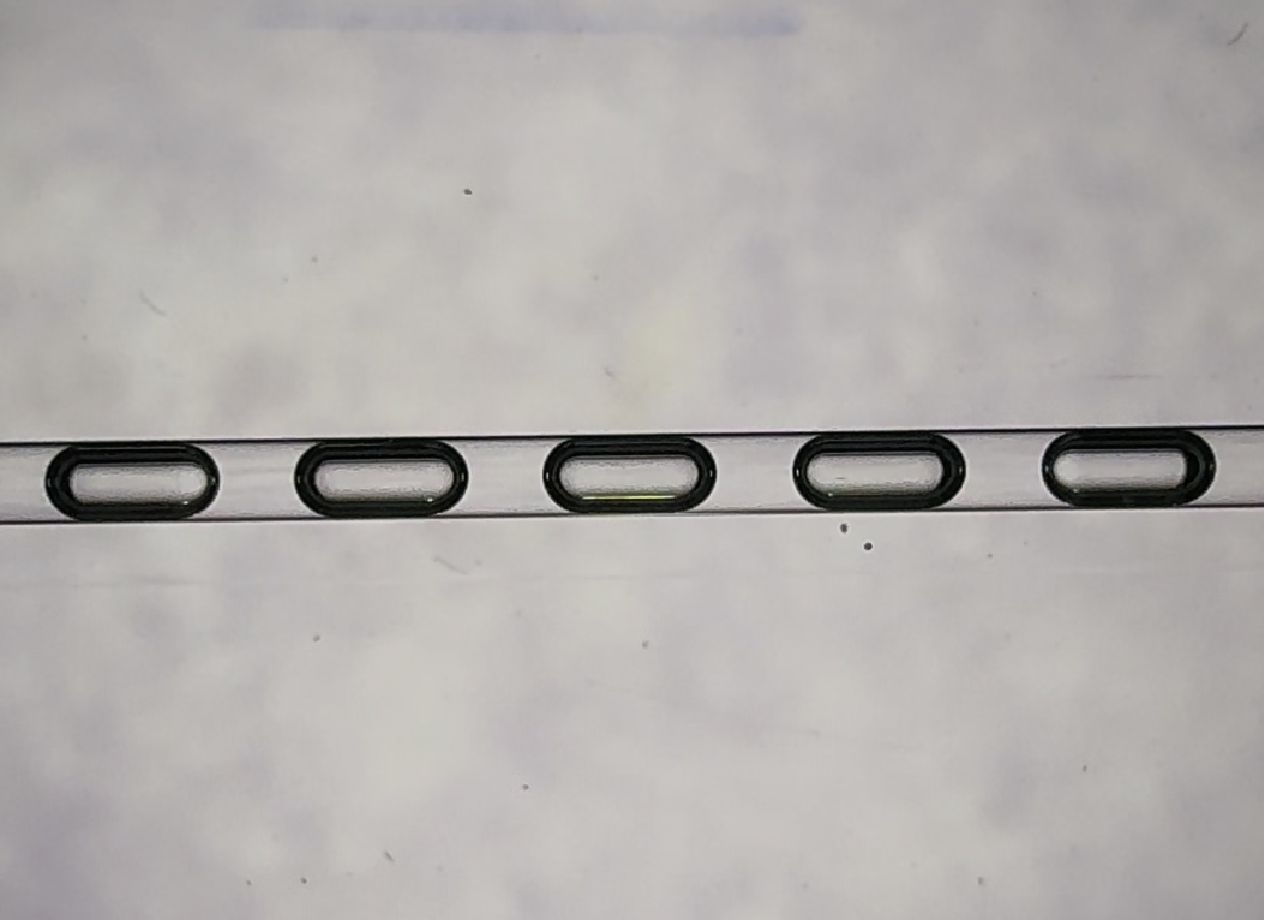

In [ ]:
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
print("Displaying prediction on custom image:")
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
print("\nCalculating radii:")
masks = outputs["instances"].pred_masks.cpu().numpy()
for i, mask in enumerate(masks):
    r = calculate_radius(mask)
    print(f"Bubble {i+1}: radius = {r:.2f} px")


Calculating radii:
